# Computer Infrastructure Assignment 2025 

### Submission by Faolán H
-----

## Modules used throughout the assignment 

Standard python modules are imported first as per good practise guidelines

### Source documentation for the modules:
- datetime (https://docs.python.org/3/library/datetime.html)
- Pandas (https://pandas.pydata.org/docs/)
- Matplotlib (https://matplotlib.org/stable/api/pyplot_summary.html)
- yfinance (https://github.com/ranaroussi/yfinance)


In [1]:
# listing files in a directory
import os

# datetime - formatting date and time date
import datetime as dt

# pandas - generating DataFrames and plotting them
import pandas as pd

# matplotlib.pyplot - having more plotting functionality
import matplotlib.pyplot as plt

# format the datetime of plots
import matplotlib.dates as mdates

# Yahoo Finance API data - the stock data being analysed
import yfinance as yf

-----

## There are four problems in this assignment structured throughout this Jupyter Notebook as follows:
### - Name the Problem
### - Describe the Problem
### - Solve the Problem
----------

## Problem 1: Data from yfinance

### Name the Problem
##### Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)
##### The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.

### Describe the Problem
##### There are several steps that need to be taken to solve the problem:
- Bring in the data
- Format it in the correct way
- Create a csv of the data, which is to be placed in a data folder

### Solve the Problem

#### yfinance download documentation
https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html

##### The abbreviated name of the relevant stock names has been provided. To find these abbreviated names, you can search on the official yahoo finance website (https://finance.yahoo.com/)

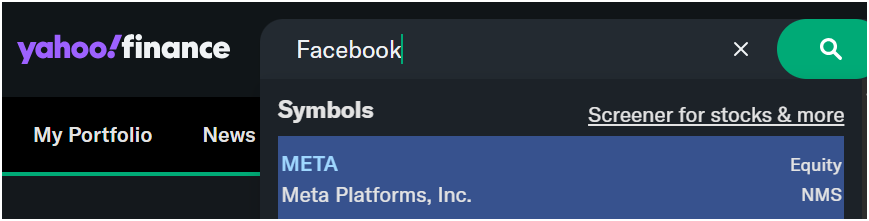

In [2]:
# Setting the DataFrame. This includes the data for the FAANG companies at a period of 5 days and 60 minute intervals
df = yf.download ('META AAPL AMZN NFLX GOOG', period = '5d', interval = '60m')
df.head(3)# Show the first three rows of the DataFrame to check column names and data structure.

/tmp/ipykernel_9997/452097128.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download ('META AAPL AMZN NFLX GOOG', period = '5d', interval = '60m')
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-11 14:30:00+00:00  276.119995  230.880005  317.059998  652.609985   
2025-12-11 15:30:00+00:00  275.825012  228.850006  315.549988  646.609985   
2025-12-11 16:30:00+00:00  277.904999  230.082504  316.059998  648.840027   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-11 14:30:00+00:00  94.394997  279.579987  232.110001  321.989990   
2025-12-11 15:30:00+00:00  94.084999  276.589996  231.039993  317.890015   
2025-12-11 16:30:00+00:00  94.620003  278.179993  230.279999  316.540009   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-11 14:30:00+00:00  655.280029  94.510002  ...  279.095001  230.710007   
2025-12-11 15:30:00+00:00  653.184998  94.680000  ...  276.114990  230.860001   
2025-12-11 16:30:00+00:00  649.719971  94.820000  ...  275.820007  228.889999   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-11 14:30:00+00:00  320.940002  642.729980  93.855003  6887208   
2025-12-11 15:30:00+00:00  317.075012  652.539978  94.394997  2343607   
2025-12-11 16:30:00+00:00  315.524994  646.710022  94.084999  2412367   

Price                                                          
Ticker                        AMZN     GOOG     META     NFLX  
Datetime                                                       
2025-12-11 14:30:00+00:00  4677750  3634473  2302563  9038298  
2025-12-11 15:30:00+00:00  2150176  1521142   990587  4362495  
2025-12-11 16:30:00+00:00  1738077  1109293   586515  3473366  

[3 rows x 25 columns]

In [3]:
# Looking at the dataframe index to ensure there are 60m intervals
df.index

DatetimeIndex(['2025-12-11 14:30:00+00:00', '2025-12-11 15:30:00+00:00',
               '2025-12-11 16:30:00+00:00', '2025-12-11 17:30:00+00:00',
               '2025-12-11 18:30:00+00:00', '2025-12-11 19:30:00+00:00',
               '2025-12-11 20:30:00+00:00', '2025-12-12 14:30:00+00:00',
               '2025-12-12 15:30:00+00:00', '2025-12-12 16:30:00+00:00',
               '2025-12-12 17:30:00+00:00', '2025-12-12 18:30:00+00:00',
               '2025-12-12 19:30:00+00:00', '2025-12-12 20:30:00+00:00',
               '2025-12-15 14:30:00+00:00', '2025-12-15 15:30:00+00:00',
               '2025-12-15 16:30:00+00:00', '2025-12-15 17:30:00+00:00',
               '2025-12-15 18:30:00+00:00', '2025-12-15 19:30:00+00:00',
               '2025-12-15 20:30:00+00:00', '2025-12-16 14:30:00+00:00',
               '2025-12-16 15:30:00+00:00', '2025-12-16 16:30:00+00:00',
               '2025-12-16 17:30:00+00:00', '2025-12-16 18:30:00+00:00',
               '2025-12-16 19:30:00+00:00', '2025-1

#### Now to output the results as defined in the dataframe into comma separated values using datetime
#### Source datetime.today(): https://docs.python.org/3/library/datetime.html#datetime.datetime.today

In [4]:
# The dataframe is created from data from the past five working days, and so today's date is being used
today = dt.datetime.today()

#### Source strftime: https://docs.python.org/3/library/datetime.html#datetime.datetime.today

In [5]:
# This formats today into an order that suits the file output name
today_format = today.strftime("%Y.%m.%d_%H.%M.%S")

#### Source Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

In [6]:
# This brings together the data and format name into a folder specifically created for the outputs
df.to_csv("data/" + "faangdata_" + today_format + ".csv")

-----
## Problem 2: Plotting the data

### Name the Problem
##### Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.

### Describe the Problem
- I need to call the latest data file (today's one) from the 'data' folder
- I need to plot all five closing prices in a well-formatted plot
- I nned to save the plot into the 'plots' folder with a datetime formatted name

### Solve the Problem

In [7]:
# See the column headings to understand which data I need
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

##### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
##### Saving figures: Stack overflow (https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it)

##### Xaxis Datetime format Source: https://www.pythontutorials.net/blog/format-x-axis-on-chart-created-with-pandas-plot-method/#step-by-step-x-axis-formatting

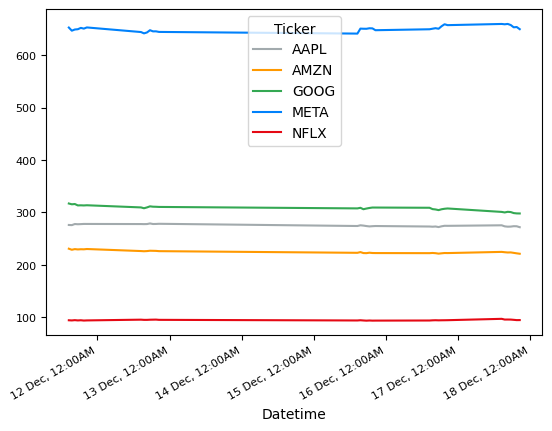

In [8]:
# Adding more functionality to the plot using fig,ax
fig, ax = plt.subplots()
# Using the company colours in the plot
colours = ('#A2AAAD', '#FF9900', '#34A853', '#0081FB', '#E50914')

date_formatter = mdates.DateFormatter('%d %b, %I:%M%p')  # %b = abbreviated month, %Y = 4-digit year
ax.xaxis.set_major_formatter(date_formatter)

# ploting all closing prices in the DataFrame
df['Close'].plot(color=colours, ax=ax, fontsize = 8);

# The dataframe is created from data from the past five working days, and so today's date is being used
today = dt.datetime.today()

# This formats today into an order that suits the file output name
today_format = today.strftime("%Y.%m.%d_%H.%M.%S")

# This brings together the data and format name into a folder specifically created for the outputs
plotname = "plots/" + "faangdata_" + today_format + ".webp"

# Save the figure into the plot folder as a webp which displays a higher quality image digitally with lower storage
fig.savefig(plotname, dpi = 500)

In [9]:
# date.max 
# https://docs.python.org/3/library/datetime.html
data = open('data/faangdata_2025.11.02_17.06.55.csv')
data

<_io.TextIOWrapper name='data/faangdata_2025.11.02_17.06.55.csv' mode='r' encoding='UTF-8'>

In [10]:
# https://stackoverflow.com/questions/75539438/get-a-dataframe-from-a-python-notebook-ipynb-to-another
plotdata = pd.read_csv('data/faangdata_2025.11.02_17.06.55.csv')

-----
## Problem 3: Script

### Name the Problem

##### Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

### Describe the Problem


In [11]:
# List files in the data folder
datafiles = os.listdir('data/')

### https://docs.python.org/3/howto/sorting.html

In [12]:
# Sort the list of files by date
datafiles.sort(reverse = True)
datafiles

['faangdata_2025.12.17_22.29.24.csv',
 'faangdata_2025.12.06_13.29.43.csv',
 'faangdata_2025.11.30_13.38.57.csv',
 'faangdata_2025.11.23_20.19.09.csv',
 'faangdata_2025.11.23_19.25.23.csv',
 'faangdata_2025.11.23_18.59.08.csv',
 'faangdata_2025.11.23_18.55.29.csv',
 'faangdata_2025.11.23_17.28.19.csv',
 'faangdata_2025.11.23_16.53.58.csv',
 'faangdata_2025.11.23_15.31.05.csv',
 'faangdata_2025.11.23_14.38.58.csv',
 'faangdata_2025.11.23_14.34.18.csv',
 'faangdata_2025.11.09_11.53.05.csv',
 'faangdata_2025.11.09_11.48.39.csv',
 'faangdata_2025.11.09_11.35.39.csv',
 'faangdata_2025.11.09_11.22.33.csv',
 'faangdata_2025.11.09_09.58.24.csv',
 'faangdata_2025.11.09_09.53.59.csv',
 'faangdata_2025.11.09_09.33.25.csv',
 'faangdata_2025.11.02_18.50.42.csv',
 'faangdata_2025.11.02_18.40.24.csv',
 'faangdata_2025.11.02_18.32.57.csv',
 'faangdata_2025.11.02_18.26.05.csv',
 'faangdata_2025.11.02_17.06.55.csv',
 'faangdata_2025.11.02_17.03.58.csv',
 'faangdata_2025.10.21_22.37.43.csv']

In [13]:
# latest file

datafiles [0]

'faangdata_2025.12.17_22.29.24.csv'

In [30]:
# calling the newest csv, generating two header rows and skipping the NaN row
df_update = pd.read_csv(f'data/{datafiles[0]}', header = [0,1], index_col = 0, parse_dates = True)

df_update.head(3)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-11 14:30:00+00:00  276.119995  230.880005  317.059998  652.609985   
2025-12-11 15:30:00+00:00  275.825012  228.850006  315.549988  646.609985   
2025-12-11 16:30:00+00:00  277.904999  230.082504  316.059998  648.840027   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-11 14:30:00+00:00  94.394997  279.579987  232.110001  321.989990   
2025-12-11 15:30:00+00:00  94.084999  276.589996  231.039993  317.890015   
2025-12-11 16:30:00+00:00  94.620003  278.179993  230.279999  316.540009   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-11 14:30:00+00:00  655.280029  94.510002  ...  279.095001  230.710007   
2025-12-11 15:30:00+00:00  653.184998  94.680000  ...  276.114990  230.860001   
2025-12-11 16:30:00+00:00  649.719971  94.820000  ...  275.820007  228.889999   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-11 14:30:00+00:00  320.940002  642.729980  93.855003  6887208   
2025-12-11 15:30:00+00:00  317.075012  652.539978  94.394997  2343607   
2025-12-11 16:30:00+00:00  315.524994  646.710022  94.084999  2412367   

Price                                                          
Ticker                        AMZN     GOOG     META     NFLX  
Datetime                                                       
2025-12-11 14:30:00+00:00  4677750  3634473  2302563  9038298  
2025-12-11 15:30:00+00:00  2150176  1521142   990587  4362495  
2025-12-11 16:30:00+00:00  1738077  1109293   586515  3473366  

[3 rows x 25 columns]

In [31]:
df_update.index

DatetimeIndex(['2025-12-11 14:30:00+00:00', '2025-12-11 15:30:00+00:00',
               '2025-12-11 16:30:00+00:00', '2025-12-11 17:30:00+00:00',
               '2025-12-11 18:30:00+00:00', '2025-12-11 19:30:00+00:00',
               '2025-12-11 20:30:00+00:00', '2025-12-12 14:30:00+00:00',
               '2025-12-12 15:30:00+00:00', '2025-12-12 16:30:00+00:00',
               '2025-12-12 17:30:00+00:00', '2025-12-12 18:30:00+00:00',
               '2025-12-12 19:30:00+00:00', '2025-12-12 20:30:00+00:00',
               '2025-12-15 14:30:00+00:00', '2025-12-15 15:30:00+00:00',
               '2025-12-15 16:30:00+00:00', '2025-12-15 17:30:00+00:00',
               '2025-12-15 18:30:00+00:00', '2025-12-15 19:30:00+00:00',
               '2025-12-15 20:30:00+00:00', '2025-12-16 14:30:00+00:00',
               '2025-12-16 15:30:00+00:00', '2025-12-16 16:30:00+00:00',
               '2025-12-16 17:30:00+00:00', '2025-12-16 18:30:00+00:00',
               '2025-12-16 19:30:00+00:00', '2025-1

-----
## Problem 4: Automation
##### Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.

-----
# END
-----